# Case 1. UCI Heart disease classifier
**Neural Networks for Machine Learning Applications**<br>
14.1.2022<br>
Lauri Marjanen<br>
Metropolia University of Applied Sciences

## 1. Introduction and background

This report shows ...

## 2. Setup

The following libraries and functions are used

In [1]:
%pylab inline
import time
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses, metrics, optimizers

print(f'tensorflow version: {tf.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

Populating the interactive namespace from numpy and matplotlib
tensorflow version: 2.7.0
pandas version: 1.3.5
seaborn version: 0.11.2


## 3. Dataset

In [1]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(file, header = None, na_values = '?')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalac', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

NameError: name 'pd' is not defined

## 4. Preprocessing

In [3]:
labels = df['num']
features = df.drop('num', axis = 1)
features.fillna(0, inplace = True)

In [4]:
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [5]:
from numpy import shape

labels = 1.0*(labels > 0)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=0)
shape(train_features), shape(test_features)

((227, 13), (76, 13))

## 4. Modeling

In [6]:
normalize = layers.Normalization()
normalize.adapt(train_features)

def make_model():
    model = models.Sequential([
        normalize,
        layers.Dense(5, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(
        optimizer = optimizers.RMSprop(),
        loss = losses.BinaryCrossentropy(),
        metrics = metrics.BinaryAccuracy(name = 'acc')
    )
    
    return model
    
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 103
Trainable params: 76
Non-trainable params: 27
_________________________________________________________________


## 5. Training

In [7]:
EPOCHS = 50

t0 = time.time()
r = model.fit(
    train_features,
    train_labels,
    epochs = EPOCHS,
    batch_size = 128,
    verbose = 0,
    )

t1 = time.time()
etime = t1 - t0
print(f'Total elapsed time {etime:.2f} s and {etime/EPOCHS:.3f} s/epoch')

Total elapsed time 1.50 s and 0.030 s/epoch


## 6. Performance and evaluation

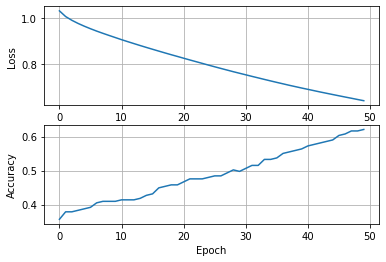

In [8]:
from matplotlib.pyplot import subplot, plot, grid, ylabel, xlabel, show

epochs = r.epoch
loss = r.history['loss']
acc = r.history['acc']

subplot(2, 1, 1)
plot(epochs, loss)
grid()
ylabel('Loss')

subplot(2, 1, 2)
plot(epochs, acc)
grid()
ylabel('Accuracy')
xlabel('Epoch')
show()

In [9]:
print(f'Training loss = {loss[-1]:.3f}')
print(f'Training accuracy = {acc[-1]:.3f}')

Training loss = 0.643
Training accuracy = 0.621


In [10]:
test_loss, test_acc = model.evaluate(test_features, test_labels, verbose = 0)
print(f'Test loss = {test_loss:.3f}')
print(f'Test accuracy = {test_acc:.3f}')

Test loss = 0.714
Test accuracy = 0.553


In [11]:
predictions = model.predict(train_features)
pred_labels = 1.0*(predictions >= 0.5)

In [12]:
cm = confusion_matrix(train_labels, pred_labels)
print(cm)

[[65 59]
 [26 77]]


In [13]:
tn, fp, fn, tp = confusion_matrix(train_labels, pred_labels).ravel()
print('              Confusion matrix')
print(f'                 Prediction')
print(f'Diagnose  Healthy   Disease      SUM')
print(f'Healthy  {tn:8d}  {fp:8d} {tn+fp:8d}')
print(f'Disease  {fn:8d}  {tp:8d} {fn+tp:8d}')
print(f'SUM      {tn+fn:8d}  {fp+tp:8d} {tn+fp+fn+tp:8d}')

              Confusion matrix
                 Prediction
Diagnose  Healthy   Disease      SUM
Healthy        65        59      124
Disease        26        77      103
SUM            91       136      227


In [14]:
cr = classification_report(train_labels, pred_labels, target_names = ['Healthy', 'Disease'])
print(cr)

              precision    recall  f1-score   support

     Healthy       0.71      0.52      0.60       124
     Disease       0.57      0.75      0.64       103

    accuracy                           0.63       227
   macro avg       0.64      0.64      0.62       227
weighted avg       0.65      0.63      0.62       227



In [15]:
print(f'Precision for Healthy = {tn/(tn+fn):.2f}')
print(f'Precision for Disease = {tp/(fp+tp):.2f}')

Precision for Healthy = 0.71
Precision for Disease = 0.57


## 7. Discussion and conclusions